# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria
Modified by C. Gentemann for GHRSST Science Team Tutorial 2019, Rome, Italy
  
  Sunday, 31 May 2019, 9:00 - 2:00  Hotel Flora  
  
  
**Convenors**
* [Dr Chelle Gentemann](mailto:gentemann@esr.org)    - Earth and Space Research, USA
* [Dr Marisol Garcia-Reyes](mailto:marisolgr@faralloninstitute.org)  - Farallon Institute, USA 
-------------


# With

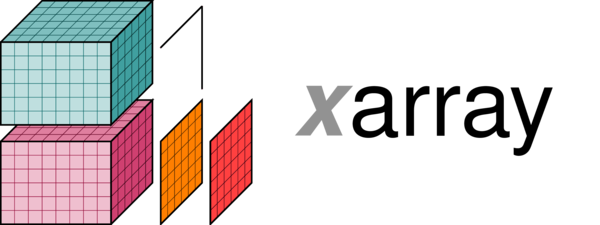

# you can reach

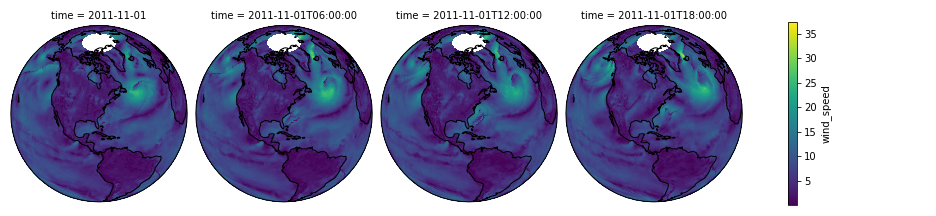

# Structure of this tutorial

1. Opening data
3. Advanced data plotting and exploration
4. Collocating satellite data with a cruise dataset



# 1. Key features of `xarray`

-------------------

## Import python packages

You are going to want numpy, pandas, matplotlib.pyplot and xarray

In [1]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

## Let's open a wind speed
Below, let's open CCMP winds for the same day using xarray.
To open a file use[xr.open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html)

The url filename we want to use is already included for you.

Then just print out the file details by just typing the dataset name, ds_ccmp

In [2]:
#ds_ccmp = ds_ccmp.where(ds_ccmp.sst>-1000.0,np.nan)
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ccmp/L3.0/flk/2011/11/analysis_20111101_v11l30flk.nc.gz'
ds_ccmp = xr.open_dataset(url)
ds_ccmp

<xarray.Dataset>
Dimensions:  (lat: 628, lon: 1440, time: 4)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 -78.375 -78.125 -77.875 ... 77.875 78.125 78.375
  * time     (time) datetime64[ns] 2011-11-01 ... 2011-11-01T18:00:00
Data variables:
    uwnd     (time, lat, lon) float32 ...
    vwnd     (time, lat, lon) float32 ...
    nobs     (time, lat, lon) float32 ...
Attributes:
    Conventions:                     COARDS
    title:                           Atlas FLK v1.1 derived surface winds (le...
    description:                     VAM 6-hour analyses starting from the EC...
    history:                         Created by NASA Goddard Space Flight Cen...
    base_date:                       [2011   11    1]
    DODS_EXTRA.Unlimited_Dimension:  time

## If you look at the time values you can see that the dataset is at :00, :06, :12, :18

* If you look at the lon values you can see that this dataset is 0-360 rather than -180-180, 

*  let's change the longitude coordinates using [.coords](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.coords.html) and then [.sortby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sortby.html) |

## To get from 0-360 to -180-180
```
ds_ccmp.coords['lon'] = np.mod(ds_ccmp.coords['lon'] + 180,360) - 180  
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
```

## To get from -180-180 to 0-360
```
ds_ccmp.coords['lon'] = np.mod(ds_ccmp['lon'], 360)
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
```

## Okay, try going from 0-360 to -180-180 below and then print out the dataset

In [3]:
ds_ccmp.coords['lon'] = np.mod(ds_ccmp.coords['lon'] + 180,360) - 180
ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)
ds_ccmp['wind_speed'] = np.sqrt(ds_ccmp.uwnd**2 + ds_ccmp.vwnd**2)
ds_ccmp['wind_dir'] = np.arctan2(ds_ccmp.vwnd,ds_ccmp.uwnd)/np.pi*180
ds_ccmp

<xarray.Dataset>
Dimensions:     (lat: 628, lon: 1440, time: 4)
Coordinates:
  * lon         (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * lat         (lat) float32 -78.375 -78.125 -77.875 ... 77.875 78.125 78.375
  * time        (time) datetime64[ns] 2011-11-01 ... 2011-11-01T18:00:00
Data variables:
    uwnd        (time, lat, lon) float32 -1.9379845 -2.0539584 ... 7.2849903
    vwnd        (time, lat, lon) float32 6.0886283 5.9818106 ... -6.113044
    nobs        (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    wind_speed  (time, lat, lon) float32 6.389615 6.324619 ... 9.737151 9.510015
    wind_dir    (time, lat, lon) float32 107.65605 108.95079 ... -40.000973
Attributes:
    Conventions:                     COARDS
    title:                           Atlas FLK v1.1 derived surface winds (le...
    description:                     VAM 6-hour analyses starting from the EC...
    history:                         Created by NASA Goddard Space Fli

## Now look at your dataset, both are -180 to 180!


# 5. Graphics 

``xarray`` plotting functions rely on matplotlib internally, but they make use of all available metadata to make the plotting operations more intuitive and interpretable.  Plotting examples are given [here](http://xarray.pydata.org/en/stable/plotting.html)

# Histogram and subplots

* Create a figure with two axes using `fig, axes = plt.supplots(ncols=2)`

* To plot on a specific ax you need to set `ax = axes[0]` or `ax = axes[1]` in the hist argument

* Plot the ocean winds histogram on the first axes using [.plot.hist()](http://xarray.pydata.org/en/stable/generated/xarray.plot.hist.html) and the global land/ocean winds on the next

* Change the number of bins using an argument in hist eg.  `bins=20`

* Different [arguments](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) for .hist  trying making a PDF by using density = True  or change the style of the plot using `histtype = 'step'`


(array([1.03171739e-05, 2.36516345e-05, 4.77899282e-05, 1.42007234e-04,
        2.96570084e-04, 7.30378047e-04, 2.51437315e-03, 6.06708225e-03,
        1.47230963e-02, 2.58877403e-02, 4.97094134e-02, 8.49620387e-02,
        8.05006389e-02, 5.10756561e-02, 2.20052666e-02, 8.88075375e-03,
        3.15432992e-03, 9.78477209e-04, 3.19151068e-04, 4.77899282e-05]),
 array([-33.406578 , -30.566286 , -27.725994 , -24.885702 , -22.045412 ,
        -19.20512  , -16.364828 , -13.524536 , -10.684244 ,  -7.8439527,
         -5.003661 ,  -2.1633694,   0.6769222,   3.5172138,   6.357506 ,
          9.197798 ,  12.038089 ,  14.878381 ,  17.718672 ,  20.558964 ,
         23.399256 ], dtype=float32),
 <a list of 1 Patch objects>)

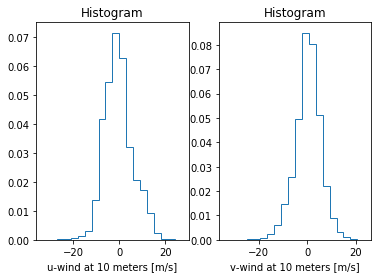

In [4]:
fig, axes = plt.subplots(ncols=2)
ds_ccmp.uwnd.plot.hist(bins=20,ax=axes[0],density = True,histtype='step')
ds_ccmp.vwnd.plot.hist(bins=20,ax=axes[1],density = True,histtype='step')

## facet plot allows to do multiplot with the same color mappings

To make a facet plot, use `.plot.contourf` and set your `x`, `y`, `col` values  (eg. 'lat' 'lon' 'time')

You also want `col_wrap=2` and `levels=22`

In [ ]:
ds_ccmp.wind_speed.plot.contourf(x='lon', y='lat', col='time', col_wrap=2, levels=22);

### Plotting on maps

For plotting on maps, we rely on the excellent [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) library.

In [5]:
import cartopy.crs as ccrs

## In cartopy you need to define the map projection you wan to plot.  

Common ones are Ortographic and PlateCarree.
So, use ax = plt.axes( set your projection here)

This creats an empty plot on axes = ax

We now plot the data onto ax and use the key transform = to tell the projection that the data is stored in

You can add coastlines and gridlines to the axes as well.

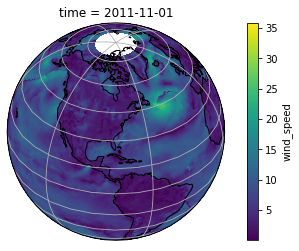

In [6]:
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ds_ccmp.wind_speed[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines(); 

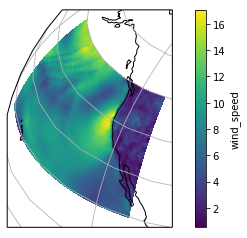

In [7]:
subset = ds_ccmp.sel(lat=slice(20,50),lon=slice(-170,-110)).mean('time')
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
subset.wind_speed.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines(); 


(20, 50)

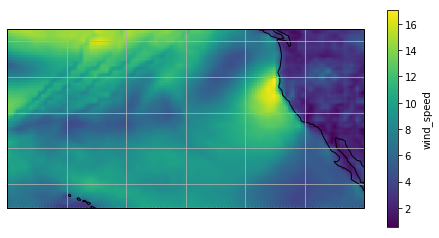

In [8]:
subset = ds_ccmp.sel(lat=slice(20,50),lon=slice(-170,-110)).mean('time')
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
subset.wind_speed.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines(); 
ax.set_xlim(-170,-110); ax.set_ylim(20,50)


#### Facet plots on maps

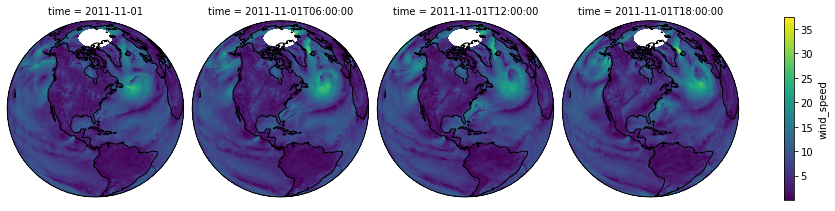

In [9]:
p = ds_ccmp.wind_speed.plot(x='lon', y='lat', col='time', transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.Orthographic(-80, 35)})
for ax in p.axes.flat:
    ax.coastlines()
#fig_fname='./images/ccmp_6hourly.png'
#p.fig.savefig(fig_fname, transparent=False, format='png')

## there is no land mask in CCMP data, so just to demonstrate how to get a nice land mask, use .where and ds_ccmp.nobs to set data over land to NaN.  The xarray function .where(cond,other) the argument other is a value that is set when cond=False


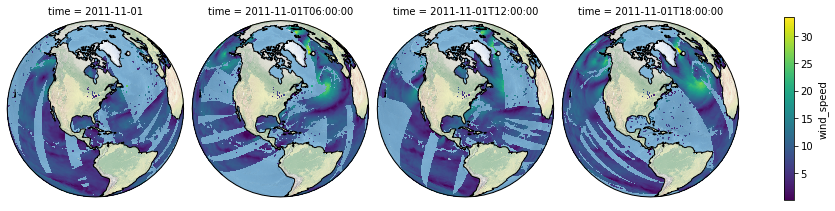

In [10]:
ds_ccmp_ocn = ds_ccmp.where(ds_ccmp.nobs>0,np.nan)
p = ds_ccmp_ocn.wind_speed.plot(x='lon', y='lat', col='time', transform=ccrs.PlateCarree(),
                  subplot_kws={'projection': ccrs.Orthographic(-80, 35)})
for ax in p.axes.flat:
    ax.coastlines()
    ax.stock_img();

## A nice cartopy tutorial is [here](http://earthpy.org/tag/visualization.html)

# 6. Collocate a Saildrone cruise with MUR SST data

### Let's open 2 months of 0.2 km AVHRR OI SST data

`xarray`can open multiple files at once using string pattern matching.  
  
  In this case we open all the files that match our `filestr`, i.e. all the files for the 2080s. 
  
  Each of these files (compressed) is approximately 800 MB.

In [11]:
from glob import glob
filepath = './data/avhrr_oi/*.nc'
files = glob(filepath,recursive=True)
files[:10]

['./data/avhrr_oi\\avhrr-only-v2.20180410.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180411.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180412.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180413.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180414.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180415.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180416.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180417.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180418.nc',
 './data/avhrr_oi\\avhrr-only-v2.20180419.nc']

# Let's see what one day looks like

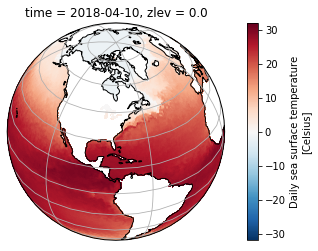

In [12]:
ds_sst = xr.open_dataset(files[0])
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ds_sst.sst[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines(); 

# Change the colormap, colorscale, and add land

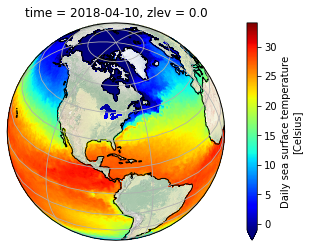

In [13]:
f = plt.figure(figsize=(8, 4))
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ds_sst.sst[0,:,:].plot(ax=ax, transform=ccrs.PlateCarree(),cmap='jet',vmin=-1,vmax=34)
ax.coastlines(); ax.gridlines();
ax.stock_img();
#fig_fname='./images/sst_avhrroi.png'
#f.savefig(fig_fname, transparent=False, format='png')

## Now open multiple files (lazy) using [.open_mfdataset](http://xarray.pydata.org/en/stable/generated/xarray.open_mfdataset.html#xarray.open_mfdataset)

* use the option `coords = 'minimal'`

In [14]:
ds_sst = xr.open_mfdataset(files,coords='minimal')
ds_sst

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 64, zlev: 1)
Coordinates:
  * zlev     (zlev) float32 0.0
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * time     (time) datetime64[ns] 2018-04-10 2018-04-11 ... 2018-06-12
Data variables:
    sst      (time, zlev, lat, lon) float32 dask.array<shape=(64, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
    anom     (time, zlev, lat, lon) float32 dask.array<shape=(64, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
    err      (time, zlev, lat, lon) float32 dask.array<shape=(64, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
    ice      (time, zlev, lat, lon) float32 dask.array<shape=(64, 1, 720, 1440), chunksize=(1, 1, 720, 1440)>
Attributes:
    Conventions:    CF-1.6
    title:          NCEI Daily-OISST-V2 based mainly on AVHRR, Final
    history:        Version 2.0
    creation_date:  2018-04-25 11:15
    source_data:    NCEP

## Again with the 0-360 vs -180-180.  Change it up below!
* Also, look at the coordinates, there is an extra one `zlev`.  Drop it using .isel



In [15]:
ds_sst.coords['lon'] = np.mod(ds_sst.coords['lon'] + 180,360) - 180
ds_sst = ds_sst.sortby(ds_sst.lon)
ds_sst = ds_sst.isel(zlev=0)
ds_sst

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 64)
Coordinates:
    zlev     float32 0.0
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
  * time     (time) datetime64[ns] 2018-04-10 2018-04-11 ... 2018-06-12
Data variables:
    sst      (time, lat, lon) float32 dask.array<shape=(64, 720, 1440), chunksize=(1, 720, 1440)>
    anom     (time, lat, lon) float32 dask.array<shape=(64, 720, 1440), chunksize=(1, 720, 1440)>
    err      (time, lat, lon) float32 dask.array<shape=(64, 720, 1440), chunksize=(1, 720, 1440)>
    ice      (time, lat, lon) float32 dask.array<shape=(64, 720, 1440), chunksize=(1, 720, 1440)>
Attributes:
    Conventions:    CF-1.6
    title:          NCEI Daily-OISST-V2 based mainly on AVHRR, Final
    history:        Version 2.0
    creation_date:  2018-04-25 11:15
    source_data:    NCEP GTS,AVHRR19,MetOpA,NCEP ICE
    source:         NOAA/National Center

`xarray` even puts them in the right order for you.

In [16]:
ds_sst.time

<xarray.DataArray 'time' (time: 64)>
array(['2018-04-10T00:00:00.000000000', '2018-04-11T00:00:00.000000000',
       '2018-04-12T00:00:00.000000000', '2018-04-13T00:00:00.000000000',
       '2018-04-14T00:00:00.000000000', '2018-04-15T00:00:00.000000000',
       '2018-04-16T00:00:00.000000000', '2018-04-17T00:00:00.000000000',
       '2018-04-18T00:00:00.000000000', '2018-04-19T00:00:00.000000000',
       '2018-04-20T00:00:00.000000000', '2018-04-21T00:00:00.000000000',
       '2018-04-22T00:00:00.000000000', '2018-04-23T00:00:00.000000000',
       '2018-04-24T00:00:00.000000000', '2018-04-25T00:00:00.000000000',
       '2018-04-26T00:00:00.000000000', '2018-04-27T00:00:00.000000000',
       '2018-04-28T00:00:00.000000000', '2018-04-29T00:00:00.000000000',
       '2018-04-30T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-05-02T00:00:00.000000000', '2018-05-03T00:00:00.000000000',
       '2018-05-04T00:00:00.000000000', '2018-05-05T00:00:00.000000000',
       '2018-0

How big is all this data uncompressed? Will it fit into memory?
Use `.nbytes` / 1e9  to convert it into gigabytes

In [ ]:
ds_sst.nbytes / 1e9  

# Collocating Saildrone cruise data with MUR SSTs 

* read in the Saildrone data 

In [17]:
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/hyrax/allData/insitu/L2/saildrone/Baja/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
ds_usv = xr.open_dataset(url)
ds_usv

<xarray.Dataset>
Dimensions:               (obs: 86839, trajectory: 1)
Coordinates:
  * trajectory            (trajectory) float32 1002.0
    time                  (trajectory, obs) datetime64[ns] ...
    latitude              (trajectory, obs) float64 ...
    longitude             (trajectory, obs) float64 ...
Dimensions without coordinates: obs
Data variables:
    SOG                   (trajectory, obs) float64 ...
    COG                   (trajectory, obs) float64 ...
    HDG                   (trajectory, obs) float64 ...
    HDG_WING              (trajectory, obs) float64 ...
    ROLL                  (trajectory, obs) float64 ...
    PITCH                 (trajectory, obs) float64 ...
    WING_ANGLE            (trajectory, obs) float64 ...
    BARO_PRES_MEAN        (trajectory, obs) float64 ...
    BARO_PRES_STDDEV      (trajectory, obs) float64 ...
    TEMP_AIR_MEAN         (trajectory, obs) float64 ...
    TEMP_AIR_STDDEV       (trajectory, obs) float64 ...
    RH_MEAN        

## The NCEI trajectory format uses 'obs' as the coordinate.  This is an example of an 'older' style of data formatting that doesn't really mesh well with modern software capabilities. 

* So, let's change that by using [.swap_dims](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.swap_dims.html) to change the coordinate from `obs` to `time`
* Another thing, `latitude` and `longitude` are just long and annoying, lets [.rename](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.rename.html) them to `lat` and `lon`

* Finally, the first and last part of the cruise the USV is being towed, so let's only include data from `2018-04-12T02` to `2018-06-10T18`


In [18]:
ds_usv = ds_usv.isel(trajectory=0).swap_dims({'obs':'time'}).rename({'longitude':'lon','latitude':'lat'})
ds_usv_subset = ds_usv.sel(time=slice('2018-04-12T02','2018-06-10T18')) 

# Xarray interpolation won't run on chunked dimensions.  
1. First let's subset the data to make it smaller to deal with by using the cruise lat/lons
    * Find the max/min of the lat/lon using `.lon.min().data`

1. Now load the data into memory (de-Dask-ify) it using `.load()`  


In [19]:
#Step 1 from above
print('min max lat lon:', ds_usv_subset.lon.min().data,ds_usv_subset.lon.max().data,ds_usv_subset.lat.min().data,ds_usv_subset.lat.max().data)
subset = ds_sst.sel(lon=slice(ds_usv_subset.lon.min().data,ds_usv_subset.lon.max().data),
                    lat=slice(ds_usv_subset.lat.min().data,ds_usv_subset.lat.max().data))
#Step 2 from above
subset.load()

min max lat lon: -125.55297279999999 -115.5226624 28.0176832 37.6797408


<xarray.Dataset>
Dimensions:  (lat: 39, lon: 40, time: 64)
Coordinates:
    zlev     float32 0.0
  * lat      (lat) float32 28.125 28.375 28.625 28.875 ... 37.125 37.375 37.625
  * lon      (lon) float32 -125.375 -125.125 -124.875 ... -115.875 -115.625
  * time     (time) datetime64[ns] 2018-04-10 2018-04-11 ... 2018-06-12
Data variables:
    sst      (time, lat, lon) float32 18.359999 18.26 18.18 ... nan nan nan
    anom     (time, lat, lon) float32 0.79999995 0.76 0.71999997 ... nan nan nan
    err      (time, lat, lon) float32 0.12 0.12 0.12 0.12 ... nan nan nan nan
    ice      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:    CF-1.6
    title:          NCEI Daily-OISST-V2 based mainly on AVHRR, Final
    history:        Version 2.0
    creation_date:  2018-04-25 11:15
    source_data:    NCEP GTS,AVHRR19,MetOpA,NCEP ICE
    source:         NOAA/National Centers for Environmental Information
    contact:        oisst-help, email: oisst

# Collocate USV data with MUR data
There are different options when you interpolate.  First, let's just do a linear interpolation using [.interp()](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp.html#xarray.Dataset.interp)

`Dataset.interp(coords=None, method='linear', assume_sorted=False, kwargs={}, **coords_kwargs))`



In [21]:
ds_collocated = subset.interp(lat=ds_usv_subset.lat,lon=ds_usv_subset.lon,time=ds_usv_subset.time,method='linear')

# Collocate USV data with MUR data
There are different options when you interpolate.  First, let's just do a nearest point rather than interpolate the data
`method = 'nearest'`

In [22]:
ds_collocated_nearest = subset.interp(lat=ds_usv_subset.lat,lon=ds_usv_subset.lon,time=ds_usv_subset.time,method='nearest')

## Now, calculate the different in SSTs and print the [.mean()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html#xarray.DataArray.mean) and [.std()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.std.html#xarray.DataArray.std)
For the satellite data we need to use `sst` and for the USV data we need to use `TEMP_CTD_MEAN`

In [ ]:
dif = ds_collocated_nearest.sst-ds_usv.TEMP_CTD_MEAN
print('mean difference = ',dif.mean().data)
print('STD = ',dif.std().data)

# xarray can do more!

* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask


In [ ]:
#ds_collocated_nearest.to_netcdf('./data/new file.nc')

## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray
